In [31]:
#Dimensionality reduction,Clustering and nearest neighbors of peptide reads
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('mhc_train.csv')
lines=list(df['sequence'])

In [32]:
import scipy.io

from numpy import argmax

X=[]

for i in range(0,len(lines)):
    
    data=lines[i]
    alphabet = 'ARNDCQEGHILKMFPSTWYVX'
# define a mapping of chars to integers
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
    integer_encoded = [char_to_int[char] for char in data]
    X.append(integer_encoded)

X=np.array(X)  

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

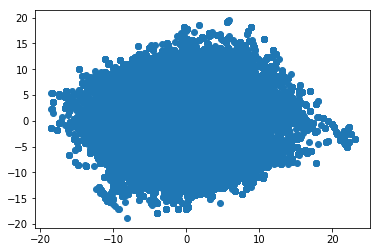

In [34]:
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:,0],principalComponents[:,1])


In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(principalComponents)

y_kmeans=kmeans.predict(principalComponents)


In [53]:
kmeans.cluster_centers_

array([[-0.82010147, -6.38038254],
       [ 6.20605891,  2.42428544],
       [-4.95965372,  3.61462729]])

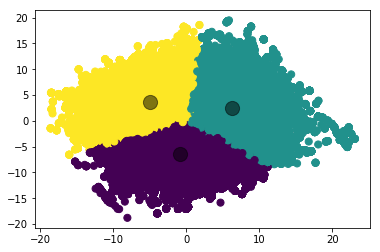

In [54]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [55]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(principalComponents)

In [56]:
distances, indices = nbrs.kneighbors(principalComponents)

In [57]:
indices

array([[    0, 83103, 28704],
       [    1, 34076, 24101],
       [    2, 22764, 20727],
       ...,
       [57688, 16322, 88200],
       [83949, 90848, 73567],
       [90849, 76194, 60200]])

In [64]:
kmeans.labels_[2]

0

In [65]:
kmeans.labels_[22764]

0

In [62]:
kmeans.labels_[28704]

1